# Introduction to Python Project : FoodHub Data Analysis

### Problem Statement

**Context**

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

**Objective**

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company improve its business.


### Data Dictionary

The data includes various information related to a food order. A detailed data dictionary is provided below.

Data Dictionary

- order_id: Unique ID of the order
- customer_id: ID of the customer who ordered the food
- restaurant_name: Name of the restaurant
- cuisine_type: Cuisine ordered by the customer
- cost_of_the_order: Cost of the order
- day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
- rating: Rating given by the customer out of 5
- food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
- delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import pandas as pd

# import libraries for data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# misc/other imports
import warnings

# import libraries for python utils
import tabulate

In [38]:
# GLOBAL OPTIONS ---

# To avoid clutter in the output, suppress warnings
warnings.filterwarnings('ignore')

# Set global figure size for all plots
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 12

# Set global color cycle for lines (this will affect line color in most plots)
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#ce8d61'])

# Set the grid style globally (for both major and minor grids)
#plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.alpha'] = 0.6
# todo:
#plt.rcParams['grid.color'] = 'gray'
plt.rcParams['grid.color'] = '#E2E0E0FF'

# Set global font sizes for title, xlabel, and ylabel
plt.rcParams['axes.titlesize'] = 16  # Default font size for plot titles
plt.rcParams['axes.labelsize'] = 12  # Default font size for x and y labels

# Seaborne style ---

# Set global Seaborn style and context
# todo: decide palette
# ref: https://r02b.github.io/seaborn_palettes/
sns.set_theme(style="whitegrid", palette="muted", context="notebook")

##### 🛠️ Python Utils

In [3]:
# UTILS (plot) ---

def set_fig_size(width, height):
    '''
    Set figure size (for upcoming plot only)
    NOTE: this will apply to next plot only (& not all plot)
    '''
    plt.figure(figsize=(width, height))

def set_small_fig():
    '''
    (5, 5) -> ar: 1
    Square shaped fig (eg: scatter plot)
    '''
    set_fig_size(5, 5)

def set_medium_fig():
    '''
    (9, 6) -> ar: 1.5
    Normal | Medium
    '''
    # alternate = (12, 8)
    set_fig_size(9, 6)

def set_large_fig():
    '''
    (12, 6) -> ar: 2
    Large figure
    '''
    set_fig_size(12, 6)

def set_vlarge_fig():
    '''
    (13, 5) -> ar: 2.5
    Very Large figure (Eg Time Series covering long span)
    '''
    set_fig_size(15, 6)

In [4]:
# UTILS (PANDAS) ---

def tableit(series: pd.Series, index_label: str = None, value_label: str = 'value'):
    """
    Display a pandas Series as a formatted table using the tabulate library.
    Args:
        series (pd.Series): The pandas Series to be displayed.
        index_name (str): The name of the index column. Default to `series.name`
    Returns:
        None
    """
    i_name = index_label if index_label else series.name
    table = tabulate.tabulate(series.items(), headers=[i_name, value_label], tablefmt='grid')
    print(table)

# todo: decide default value for show_index
def tableit_df(df: pd.DataFrame, show_index: bool = True):
    """
    Display a pandas DataFrame as a formatted table using the tabulate library.
    Args:
        df (pd.DataFrame): The pandas DataFrame to be displayed.
        show_index (bool): Whether to display the DataFrame index. Default is True.
    Returns:
        None
    """
    # Convert DataFrame to a tabulated string
    table = tabulate.tabulate(df, headers='keys', tablefmt='pretty', showindex=show_index)
    print(table)

In [76]:
# UTILS (Python | Primitive) ---

def snake_to_pascal(snake_str, join_with=' '):
    ''' Convert snake_case to PascalCase (eg my_name -> MyName)
    Args:
        snake_str (str): string to convert
        join_with (str): character to join the components, default is space
    '''
    components = snake_str.split('_')
    return join_with.join(x.title() for x in components)

def format_pct(val):
    ''' Format a val as percentage i.e max 2 decimal value & adding % at the end
    '''
    return f'{val:.2f}%'

In [77]:
# UTILS (Python | Stats) ---

def calc_iqr(series: pd.Series):
    '''
    series: array of numerical values
    '''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

def to_percentage(value):
    '''value is expected to be a normalized float value in [0, 1]'''
    return format_pct(value * 100)

> ⚡ **_Note_**
> 
> Please note that some lines in this notebook may appear as commented-out code (e.g., `print()/repr()`) in favor of using `tableit()/tableit_df()` for more structured outputs. These comments are intentionally left in place so that, in case the notebook is exported to a different format and the display results do not appear as expected, they can be easily reverted to the default behavior (e.g., using repr() for outputs in the original notebook).

### Understanding the structure of the data

In [6]:
# todo: delete in future
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Load the dataset
df = pd.read_csv('foodhub_order.csv')
# Make a copy of the original DataFrame (to have a original copy of the data)
original_df = df.copy()

In [8]:
# View the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


🔍 **_Observation_**:

1. The dataset contains information about food orders from various restaurants.
2. There are 9 columns in the dataset: order_id, customer_id, restaurant_name, cuisine_type, cost_of_the_order, day_of_the_week, rating, food_preparation_time, and delivery_time.
3. The 'rating' column contains both numeric and non-numeric values (e.g., 'Not given').
4. The 'day_of_the_week' column indicates whether the order was placed on a weekday or weekend.
5. The 'food_preparation_time' and 'delivery_time' columns are measured in minutes.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [9]:
rows, cols = df.shape
rows, cols

(1898, 9)

🔍 **_Observation_**:

1. The dataset contains 1898 rows and 9 columns.
2. rows corresponds to orders and columns corresponds to features of the order.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [10]:
tableit(df.dtypes, index_label='column')

+-----------------------+---------+
| column                | value   |
+=======================+=========+
| order_id              | int64   |
+-----------------------+---------+
| customer_id           | int64   |
+-----------------------+---------+
| restaurant_name       | object  |
+-----------------------+---------+
| cuisine_type          | object  |
+-----------------------+---------+
| cost_of_the_order     | float64 |
+-----------------------+---------+
| day_of_the_week       | object  |
+-----------------------+---------+
| rating                | object  |
+-----------------------+---------+
| food_preparation_time | int64   |
+-----------------------+---------+
| delivery_time         | int64   |
+-----------------------+---------+


🔍 **_Observation_**:

1. The 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' have integer values (ie numeric).
2. The 'cost_of_the_order' holds float values (ie numeric).
3. The 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' columns are of type object, indicating they contain string values.



> 🔧 **_Actionable Insights_** 
> 
> Although the 'rating' column is currently of type `object`, it should ideally be of type `int64`, as ratings are generally *ordinal* in nature. This will be addressed later (during **data cleaning/preprocessing** step).

In [11]:
# ? As suggested in question, so using the `info()` as well
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [12]:
has_missing_values =  df.isnull().any().any()
has_missing_values

False

🔍 **_Observation_**:

There are *no* explicit missing values in the dataset. However, the **rating** column contains entries labeled as **"Not given"** which indicate the *absence* of a customer rating. These entries should be treated as missing values during analysis to ensure accurate insights.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [13]:
stat_summary  = df.describe(include='all').T
stat_summary

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


🔍 **_Observation_**:

1. The dataset contains 1898 entries for each column.
2. The average cost of the orders is approximately 16.50 dollars.
3. The cost of an order lies between 4 to 36 dollars.
4. The average food preparation time is approximately 27 minutes.
5. Food preparation times range from a minimum of 20 minutes to a maximum of 35 minutes.
6. The average delivery time is around 24 minutes, with most orders being delivered within 30 minutes.
7. The restaurant with the most orders is "Shake Shack," receiving a total of 219 orders.
8. The most common cuisine type is "American" with 584 orders. 
9. The majority of orders (ie 1351) are placed on weekends.
10. The 'rating' column has 736 entries labeled as "Not given", indicating missing ratings.

In [14]:
# Q
# What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed ?

# Get the statistical summary for the 'food_preparation_time' column
food_preparation_summary = df['food_preparation_time'].describe()
food_preparation_summary

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

❓ *Question*

What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed ?

=> 

The minimum time for food preparation is 20 minutes, the average time is 27.37 minutes, and the maximum time is 35 minutes





📌 *Points*
1. 25% of the orders have a preparation time of 23 minutes or less.
2. The median food preparation time is 27 minutes, meaning that half of the orders are prepared in 27 minutes or less. 
3. 25% of the orders have a preparation time of 31 minutes or more.

📝 *Gist*

On average, restaurants take about 27 minutes to prepare food, with most orders falling between 23 and 31 minutes.
While the fastest orders are ready in 20 minutes, some take up to 35 minutes.
The slight variability in preparation time (around 4 minutes) suggests a consistent but slightly flexible pace across restaurants.


### **Question 5:** How many orders are not rated? [1 mark]

In [15]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

✅ Answer

There are 736 orders that are not rated, as indicated by the "Not given" entries in the rating column.

>  ⚡ Note
>
> There are no missing values in the 'rating' column, so these entries clearly represent the absence of a rating & hence `value_counts()` can be reliable to answer the above question
> 
> If that's was not the case, then we may need to determine it with different approach

In [16]:
# GENERIC WAY :- An alternate way to find missing values
# NOTE: this will be helpful especially when there are more than 1 rating values which are not a number
#       (ie for eg 'Not Given', 'Not rated', 'NA', etc)
#       In present case, there is only 1 value 'Not rated',
#       so it was straight forward to determine just via seeing stats-info from `value_counts()`

# find non-numeric values in the 'rating' column by converting the column to numeric & checking for NaN values
non_numeric_ratings_count = pd.to_numeric(df['rating'], errors='coerce').isnull().sum()
print(f"Number of non-numeric values in the 'rating' column: {non_numeric_ratings_count}")

Number of non-numeric values in the 'rating' column: 736


🔍 **_Observation_**

The 'rating' column contains 736 entries marked as 'Not given,' indicating that these orders were not rated by customers. 

---

#### Data Cleaning / Data PreProcessing

In [57]:
# ! NOTE: only attribute which are used further in some sort of computation/manipulation, is addressed here !!

# 1.
# NOTE: the modification is done inplace, as original df backup us already there i.e `original_df`
# convert the 'rating' column to a numeric type and replace 'Not given' with NaN for consistency.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [18]:
# Verify the changes
df['rating'].dtype

dtype('float64')

In [19]:
distinct_ratings = df['rating'].nunique()
distinct_ratings

3

In [20]:
df['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

In [21]:
# get non-numeric values count in the new 'rating' column
new_val = df['rating'].isnull().sum()
prev_val = non_numeric_ratings_count
print(f"For verification (non-numeric count): {new_val} (previously {prev_val}), is_same = {new_val == prev_val}")


For verification (non-numeric count): 736 (previously 736), is_same = True


In [22]:
df['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [175]:
# !! Assumption : Before this computation, ratings column should be converted to numeric type (ie Imputed with NaN for 'Not given' values)
# Check:-
# Top 5 restaurants with the highest average rating
top_5_restaurant_with_highest_ratings = df.groupby('restaurant_name')['rating'].mean().nlargest(5)
tableit(top_5_restaurant_with_highest_ratings, index_label='Restaurant', value_label='Average Rating')

+--------------------+------------------+
| Restaurant         |   Average Rating |
+====================+==================+
| 'wichcraft         |                5 |
+--------------------+------------------+
| 67 Burger          |                5 |
+--------------------+------------------+
| Anjappar Chettinad |                5 |
+--------------------+------------------+
| Asuka Sushi        |                5 |
+--------------------+------------------+
| Balade             |                5 |
+--------------------+------------------+


---

### Exploratory Data Analysis (EDA)

### Univariate Analysis

##### 🛠️ Python Utils

In [103]:
# write a clas that helps to draw plots for univariate analysis (ie plotter helper class)
class UnivariatePlotHelper:
    def __init__(self, df: pd.DataFrame):
        self.df = df

    def draw_countplot(self, attribute: str, *, label=None, rot=0, order=None, sort=True, palette=None, showgrid=None):
        '''
        sort: will be used only if order is None
        '''
        # prep (meta) --
        xlabel = label if label else snake_to_pascal(attribute)
        priority = None
        if order is not None:
            priority = order
        elif sort:
            # sort by count
            # NOTE: value_counts() returns a Series sorted by values (in DESC order by default)
            priority = df[attribute].value_counts().index

        # plot (crux) --
        ax = sns.countplot(data=df, x=attribute, order=priority, palette=palette)
        # display count above each bar
        ax.bar_label(ax.containers[0])

        # aesthetics --
        plt.title(f'Bar Graph of {xlabel}')
        plt.xlabel(xlabel)
        plt.ylabel('count')
        plt.xticks(rotation=rot)
        if showgrid:
            plt.grid(True)
        plt.show()

    def draw_boxplot(self, attribute: str, *, label=None):
        '''
        attribute: name of the column
        '''
        # prep
        xlabel = label if label else snake_to_pascal(attribute)
        # plot
        sns.boxplot(data=df, x=attribute)
        # aesthetics
        plt.title(f'Box Plot of {xlabel}')
        plt.xlabel(xlabel)
        plt.show()

    def draw_boxplot_fromseries(self, series: pd.Series, *, label=None):
        '''
        series: array of numeric values
        '''
        # prep
        xlabel = label if label else snake_to_pascal(series.name)
        # plot
        sns.boxplot(x=series)
        # aesthetics
        plt.title(f'Box Plot of {xlabel}')
        plt.xlabel(xlabel)
        plt.show()

    def draw_histplot(self, attribute: str, *, bins="auto", label=None, color=None):
        # prep
        xlabel = label if label else snake_to_pascal(attribute)
        # plot
        sns.histplot(data=df, x=attribute, bins=bins, kde=True, color=color)
        # aesthetics
        plt.title(f'Histogram of {xlabel}')
        plt.xlabel(xlabel)
        plt.ylabel('frequeuncy')
        plt.show()

    def draw_pieplot(self, attribute: str, *, label=None):
        # prep
        label = label if label else snake_to_pascal(attribute)
        # plot
        counts = df[attribute].value_counts()
        # aesthetics
        plt.title(f'Pie Chart of {label}', pad=20)
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')
        plt.show()

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [104]:
# helpers (init | singleton)

plot_helper = UnivariatePlotHelper(df)

In [41]:
df.columns.to_list()

['order_id',
 'customer_id',
 'restaurant_name',
 'cuisine_type',
 'cost_of_the_order',
 'day_of_the_week',
 'rating',
 'food_preparation_time',
 'delivery_time']

In [42]:
# total orders
total_orders = df.shape[0]
total_customers = df['customer_id'].nunique()
print(f'Total Orders: {total_orders} & Total Customers: {total_customers}')

Total Orders: 1898 & Total Customers: 1200


> 💡 Note: Since order_id and customer_id are nominal in nature, used primarily for identification, they are excluded from further analysis.

#### Attribute: restaurant_name

In [59]:
# Descriptive stats
restaurant_order_counts = df['restaurant_name'].value_counts()
restaurant_order_counts

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

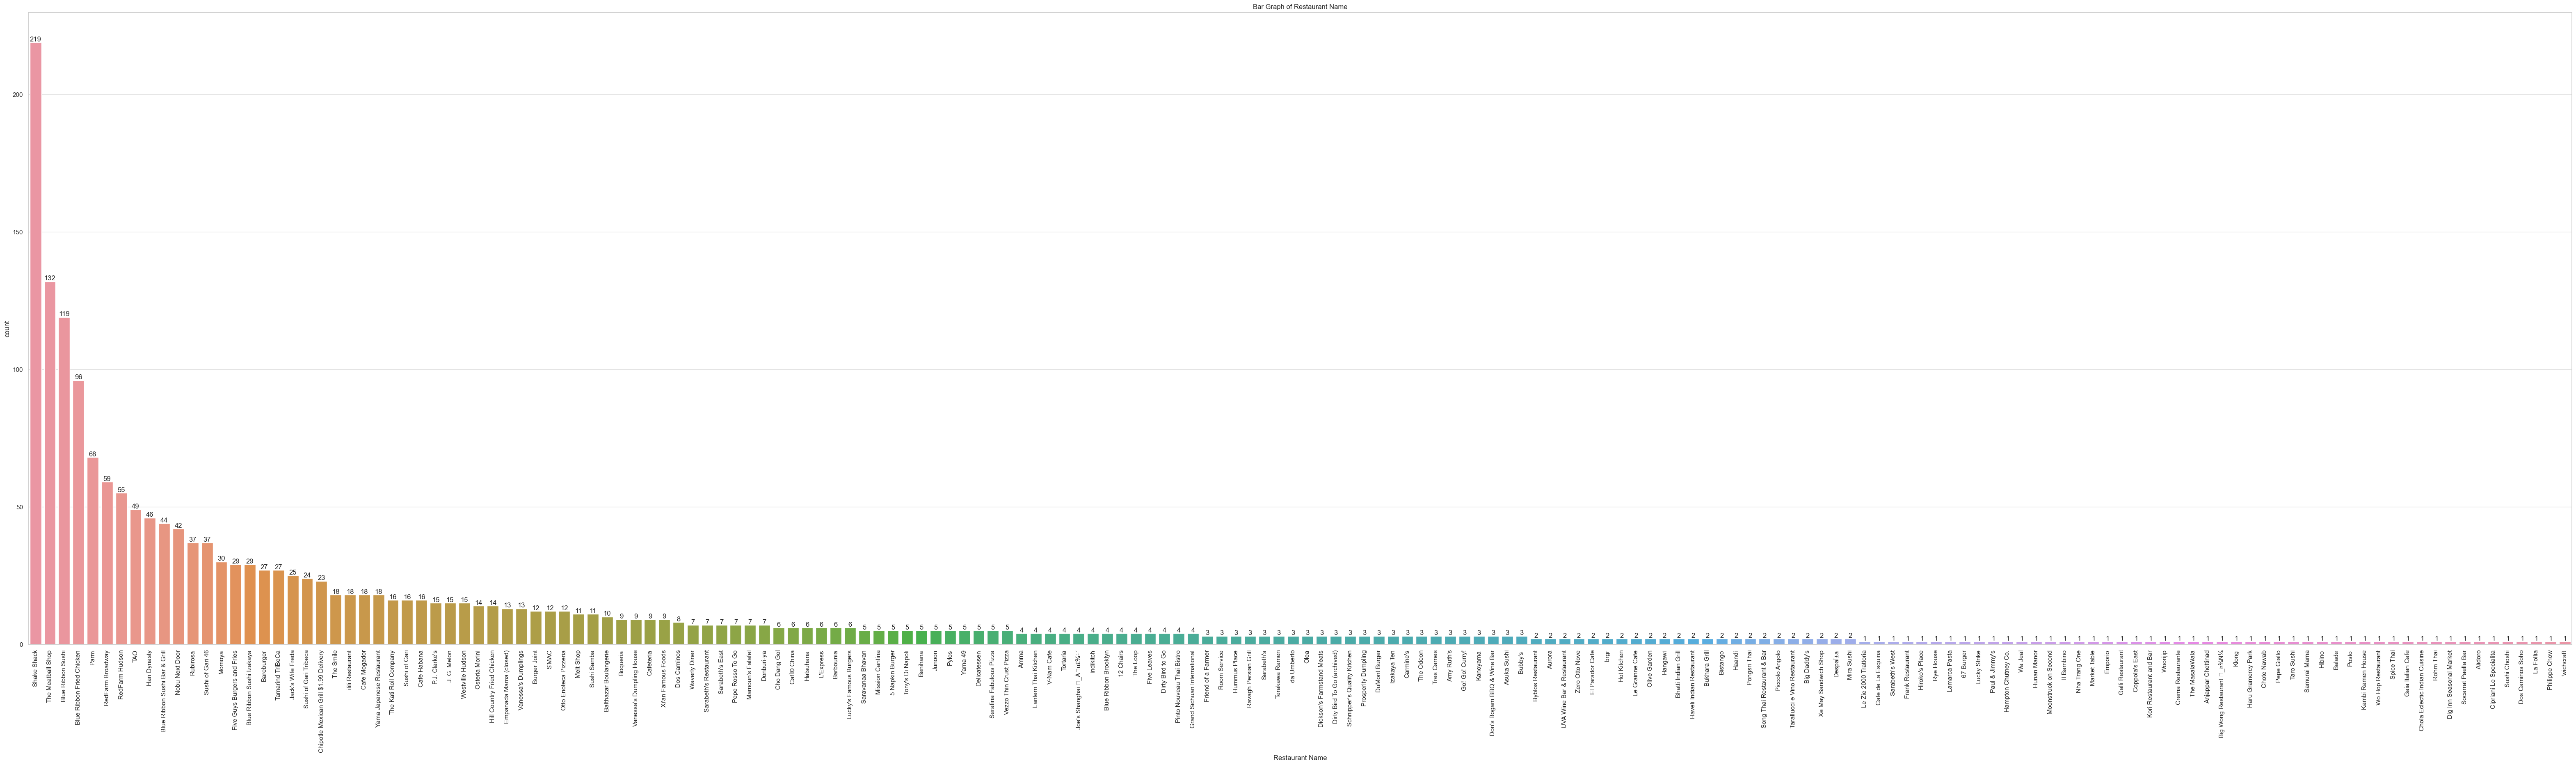

In [60]:
# PLOT

# as there are too many categories, so setting bit unconventional figuresize
set_fig_size(80, 20)
# restaurant names -> nominal variable | categorical
plot_helper.draw_countplot('restaurant_name', rot=90)

💡 Note: 

As the restaurant_name is nominal in nature, this plot is hard to visualize. Hence let try to pick some priority restaurants and plot the graph again.

In [61]:
top_n = 10
# Top 10 restaurants with the highest demand (ie maximum orders)
top_restaurants_order_count = df['restaurant_name'].value_counts().nlargest(top_n)

In [62]:
top_restaurants_names = top_restaurants_order_count.index.to_list()
print(f'Top {top_n} restaurants with the highest demand (ie maximum orders):')
print(top_restaurants_names)

Top 10 restaurants with the highest demand (ie maximum orders):
['Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', 'Parm', 'RedFarm Broadway', 'RedFarm Hudson', 'TAO', 'Han Dynasty', 'Blue Ribbon Sushi Bar & Grill']


In [63]:
tableit(top_restaurants_order_count, value_label='#orders')

+-------------------------------+-----------+
| restaurant_name               |   #orders |
+===============================+===========+
| Shake Shack                   |       219 |
+-------------------------------+-----------+
| The Meatball Shop             |       132 |
+-------------------------------+-----------+
| Blue Ribbon Sushi             |       119 |
+-------------------------------+-----------+
| Blue Ribbon Fried Chicken     |        96 |
+-------------------------------+-----------+
| Parm                          |        68 |
+-------------------------------+-----------+
| RedFarm Broadway              |        59 |
+-------------------------------+-----------+
| RedFarm Hudson                |        55 |
+-------------------------------+-----------+
| TAO                           |        49 |
+-------------------------------+-----------+
| Han Dynasty                   |        46 |
+-------------------------------+-----------+
| Blue Ribbon Sushi Bar & Grill | 

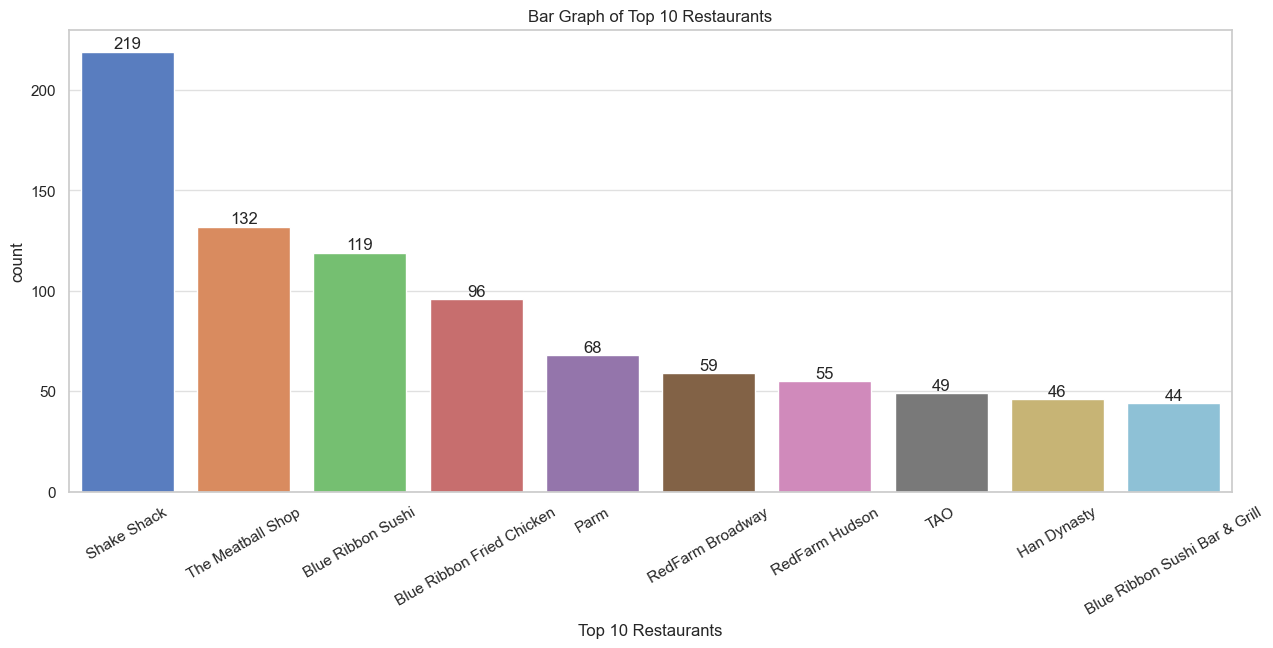

In [64]:
plot_helper.draw_countplot('restaurant_name', label=f'Top {top_n} Restaurants', rot=30, order=top_restaurants_names)

In [65]:
# less demanding restaurants order counts
least_n = 10
bottom_restaurants_order_count = df['restaurant_name'].value_counts().nsmallest(least_n)

In [66]:
bottom_restaurants_names = bottom_restaurants_order_count.index.to_list()
print(f'The {least_n} restaurants with the least demand (ie fewest orders):')
print(bottom_restaurants_names)

The 10 restaurants with the least demand (ie fewest orders):
['Le Zie 2000 Trattoria', 'Cafe de La Esquina', "Sarabeth's West", 'Frank Restaurant', "Hiroko's Place", 'Rye House', 'Lamarca Pasta', '67 Burger', 'Lucky Strike', "Paul & Jimmy's"]


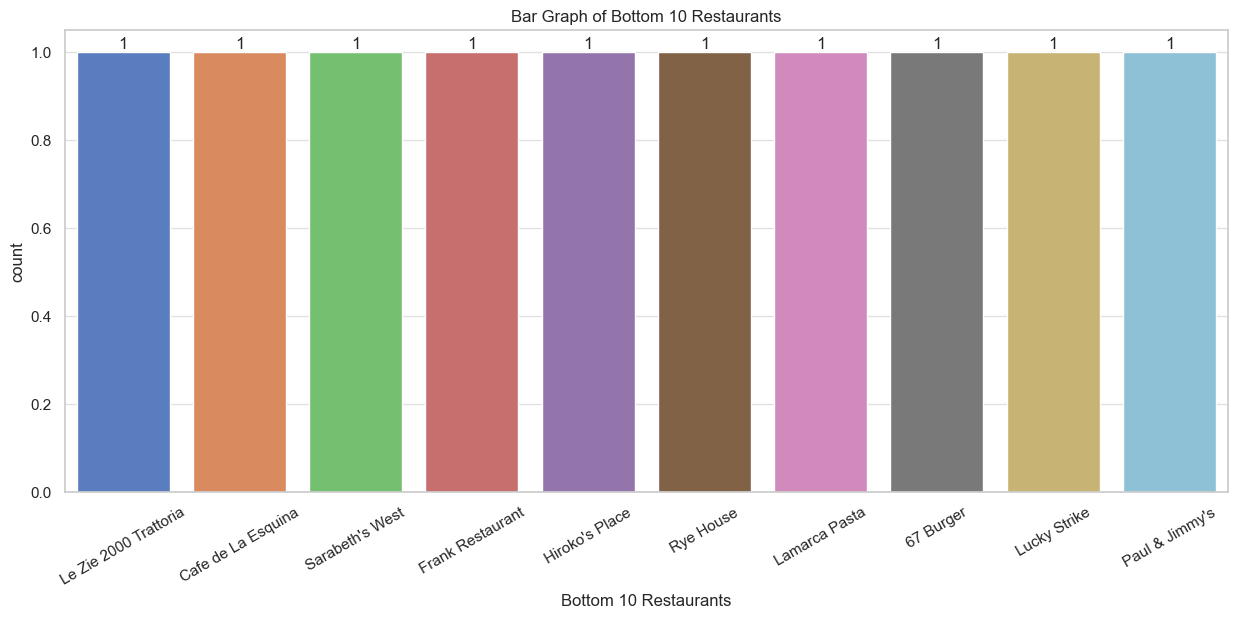

In [67]:
plot_helper.draw_countplot('restaurant_name', label=f'Bottom {least_n} Restaurants', rot=30, order=bottom_restaurants_names)

🔍 *Insights* :

All the bottom restaurants have only **1** order

In [68]:
# Descriptive stats
restaurant_order_counts.describe()

count    178.000000
mean      10.662921
std       24.047008
min        1.000000
25%        1.000000
50%        3.000000
75%        8.750000
max      219.000000
Name: restaurant_name, dtype: float64

🧠 Idea : Let try to reckon restaurant order demand summary

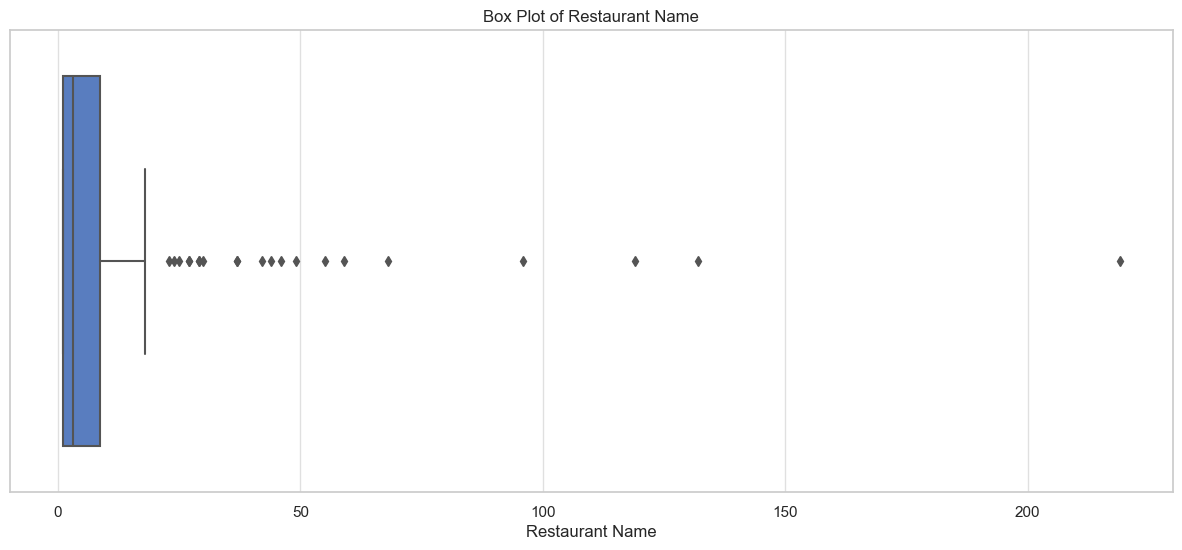

In [69]:
# PLOT

plot_helper.draw_boxplot_fromseries(restaurant_order_counts)

In [70]:
# STATS

q1, q3, _ = calc_iqr(restaurant_order_counts)
q1, q3

(1.0, 8.75)

In [71]:
# Explore | Stats

# restaurants with more than 10
restaurant_names_with_more_than_10_orders = restaurant_order_counts[restaurant_order_counts > 10].index

# get total orders count from all such restaurants
filtered_df = df[df['restaurant_name'].isin(restaurant_names_with_more_than_10_orders)]

filtered_df.shape

(1494, 9)

In [72]:
df.shape

(1898, 9)

In [78]:
diff = df.shape[0] - filtered_df.shape[0]
diff_pct = diff / df.shape[0] * 100
print(f"Total orders from restaurants with more than 10 orders: {diff} (ie {format_pct(diff_pct)}%)")

Total orders from restaurants with more than 10 orders: 404 (ie 21.29%%)


🔍 *Insights*

Only 400 (ie approx 20%) restaurants have more than 10 orders

#### Attribute: cuisine_type

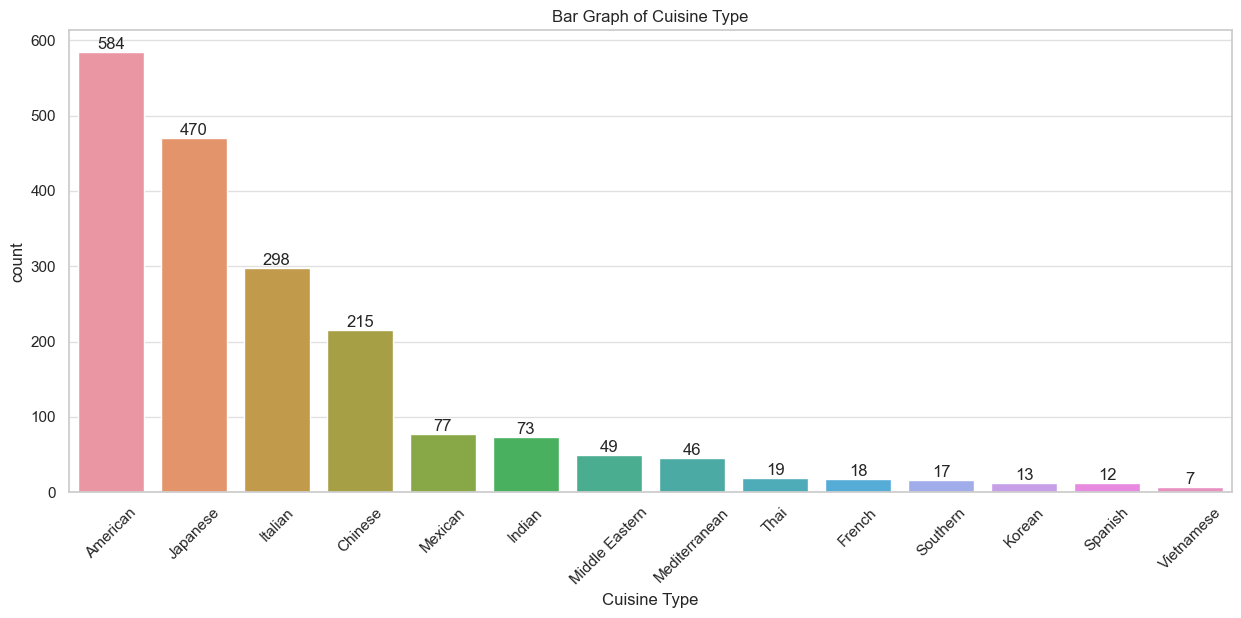

In [ ]:
# categorical
x = 'cuisine_type'
plot_helper.draw_countplot(x, rot=45)

📌 ***Points***

- The most common cuisine types are American, Japanese, and Italian.
- There are very fewer orders for cuisines like Korean, Spanish, and Vietnamese.

The distribution indicates a higher preference for certain cuisines among customers, 
Hence restaurant should focus on such cuisines to attract more customers.

In [86]:
# helper cell
# : to find next column name
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Attribute: cost_of_the_order

In [87]:
x = 'cost_of_the_order'

In [94]:
df[x].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

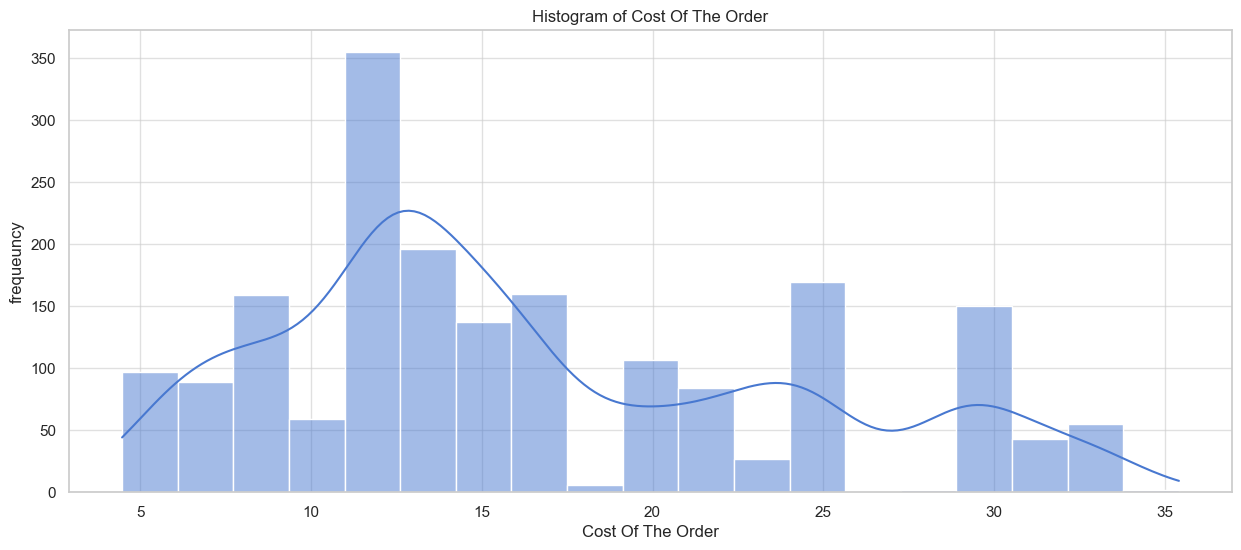

In [91]:
# Plot

plot_helper.draw_histplot(x)

📌 ***Points*** :

- The histogram for 'Cost of the Order' shows the distribution of order costs in the dataset.
- The distribution appears to be right-skewed, indicating that most orders are relatively inexpensive, with fewer high-cost orders.
- There are some outliers with significantly higher costs, which could be due to aspects.
- The presence of a KDE (Kernel Density Estimate) line helps visualize the probability density of the order costs.

In [92]:
# Descriptive stats

q1, q2, iqr = calc_iqr(df[x])
q1, q2, iqr

(12.08, 22.2975, 10.2175)

🔍 *Insights*: 

The IQR for the cost of the order is 10.21 units, i.e Half of all the orders cost somewhere between 10 units more or less than typical usual price, showing a moderate variation in how much customers are spending.

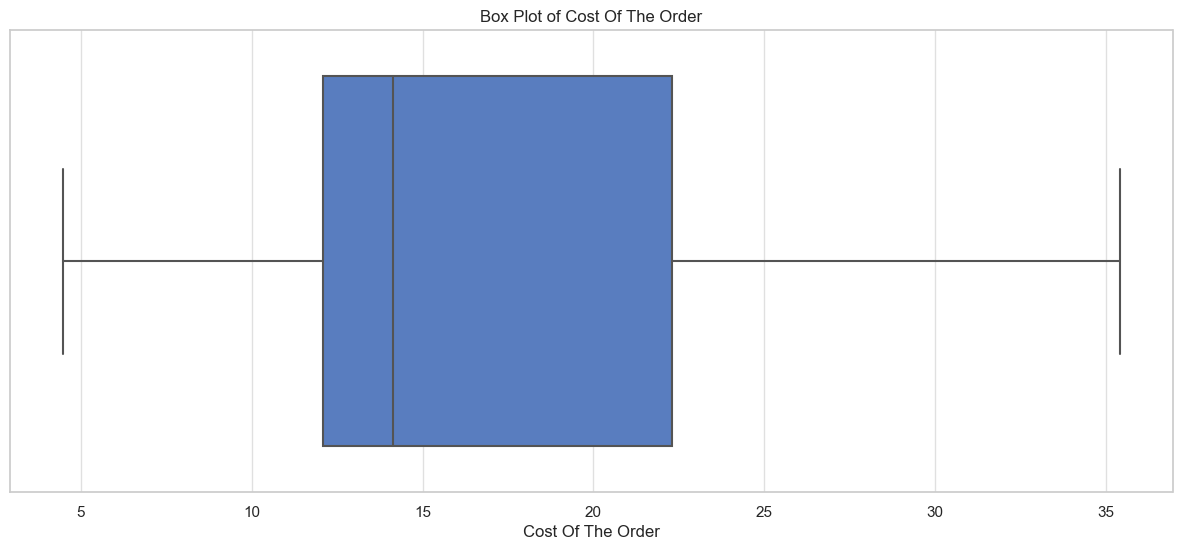

In [93]:
# Plot

plot_helper.draw_boxplot(x)

📌 ***Points***:

- The boxplot for 'Cost of the Order' shows the summary of order costs in the dataset.
- The median cost of the orders is around 15 dollar.
- The interquartile range (IQR) is approximately 10 units, indicating that the middle 50% of the orders cost between 12 and 23 dollars.
- There are several outliers with higher costs, which could be due to large or multiple orders. The presence of outliers suggests that while most orders are within a certain range, there are some orders that are significantly more expensive.

In [95]:
# Stats | More

# deeper insights
print(f"skewness: {df['cost_of_the_order'].skew()}")
print(f"kurtosis: {df['cost_of_the_order'].kurt()}")

skewness: 0.6217469995871637
kurtosis: -0.6078508734318953


🔍 *Insights*:

The cost of orders has a slight right skew (skewness of 0.6), meaning there are a few higher-cost orders compared to the majority. The negative kurtosis value (-0.6) indicates that the distribution has lighter tails and is flatter than a normal distribution, suggesting fewer extreme values (outliers) in the cost data.

🔍 **_Observation_**: 

The boxplot for 'Cost of the Order' reveals that the average order costs about 15 units, with most orders falling between 12 to 23 dollars. This means that half of the orders are within this price range. However, there are a few orders that are much more expensive, likely due to larger or multiple items being ordered. This shows that while most people are placing affordable orders, some orders can be significantly higher in cost.

In [96]:
# helper cell
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Attribute: day_of_the_week

In [99]:
# categorical
x = 'day_of_the_week'

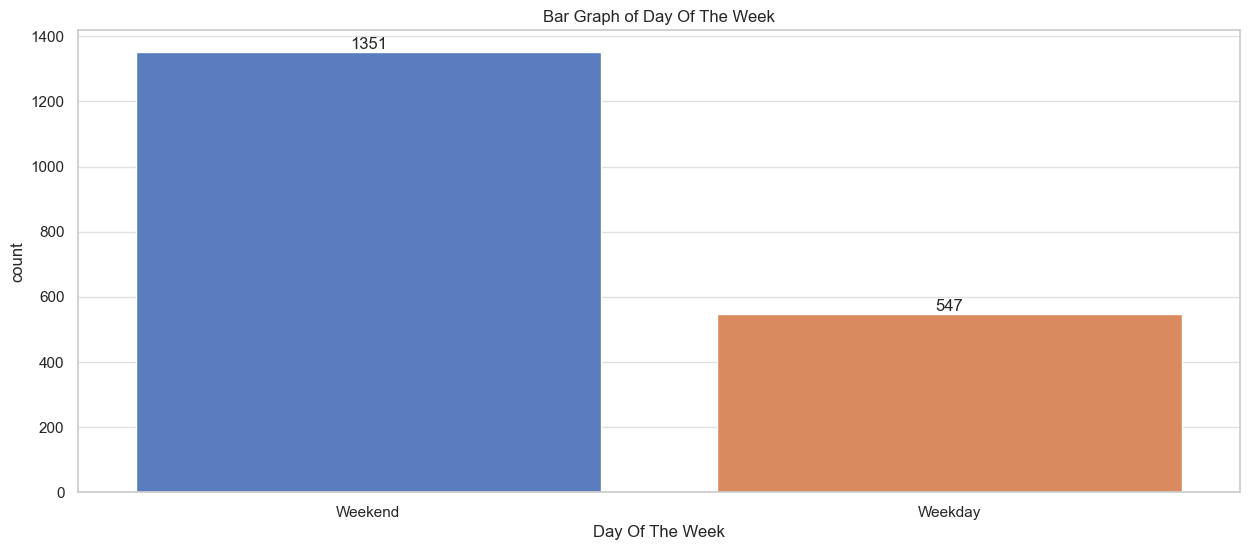

In [102]:
plot_helper.draw_countplot(x)

In [101]:
# Descriptive Statistics
order_count_by_day_category = df['day_of_the_week'].value_counts()
order_count_by_day_category_pct = df['day_of_the_week'].value_counts(normalize=True) * 100

print('Order Counts by Day of the Week:', order_count_by_day_category, sep='\n')
print('\nPercentage of Orders by Day of the Week:', order_count_by_day_category_pct, sep='\n')

Order Counts by Day of the Week:
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

Percentage of Orders by Day of the Week:
Weekend    71.18019
Weekday    28.81981
Name: day_of_the_week, dtype: float64


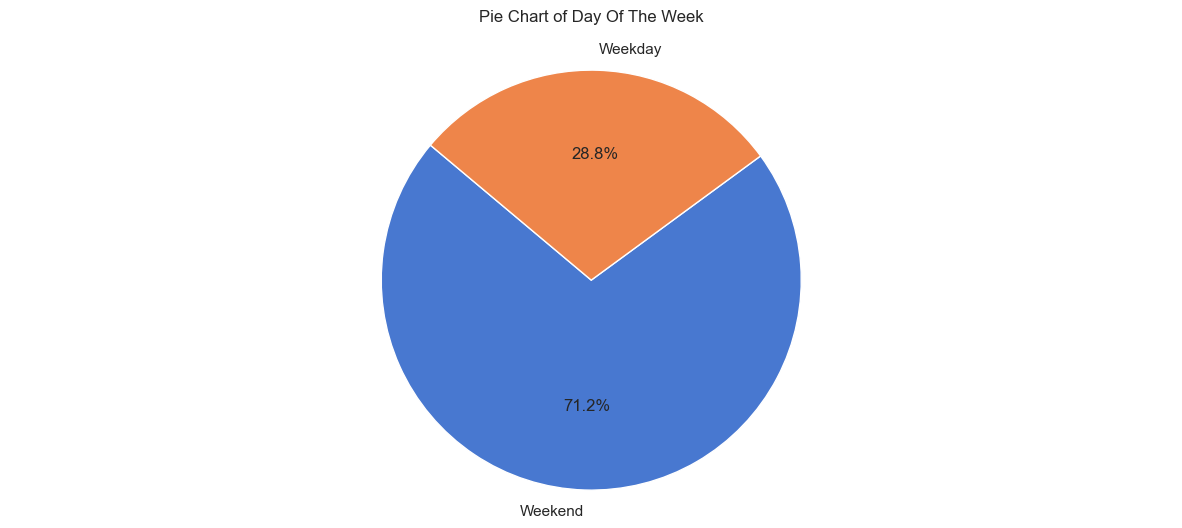

In [105]:
plot_helper.draw_pieplot(x)

📌 ***Points*** :

- The pie chart for 'Orders by Day of the Week' shows the distribution of orders between weekdays and weekends.
- The majority of orders are placed on weekends, accounting for approximately 71.2% of the total orders.
- Weekday orders make up the remaining 28.8% of the total orders.

🔍 **_Observation_**: 

There is higher demand for food orders during weekends compared to weekdays. Restaurants may consider increasing their staff and resources during weekends to handle the higher volume of orders.

In [106]:
# helper cell
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Attribute: rating

In [108]:
# Categorical | Ordinal
x = 'rating'
df[x].dtype

dtype('float64')

In [110]:
# Note; here null is same as "Not given" as we have already converted "Not given" to NaN
ratings_not_given = df[x].isnull().sum()
ratings_not_given

736

In [113]:
ratings_not_given_pct = ratings_not_given / total_orders * 100
print(f"Percentage of orders wihtout rating: {format_pct(ratings_not_given_pct)}")

Percentage of orders wihtout rating: 38.78%


🔍 *Insights*:

A significant portion of the ratings are 'Not given', indicating that many customers did not provide a rating.

NOTE: Plots addresses orders with rating 

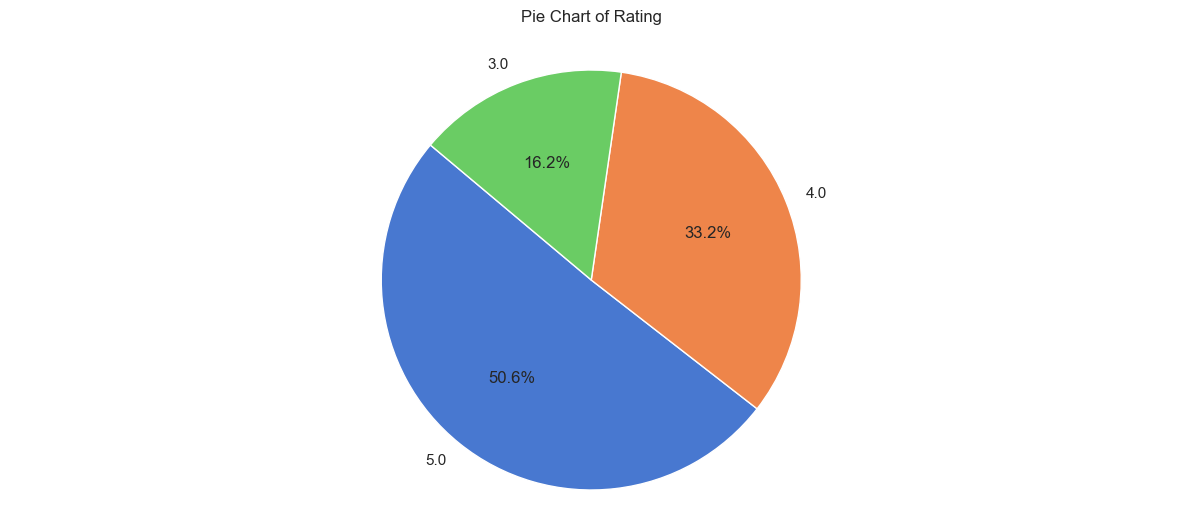

In [109]:
# Plot
plot_helper.draw_pieplot(x)

📌 ***Points***:

- The pie chart for 'Rating' shows the distribution of ratings given by customers.
- Among the given ratings, the most common rating is 5, followed by 4 and 3.


In [118]:
# Stats

tableit(df[x].value_counts(), index_label='Rating', value_label='#Orders')

+----------+-----------+
|   Rating |   #Orders |
+==========+===========+
|        5 |       588 |
+----------+-----------+
|        4 |       386 |
+----------+-----------+
|        3 |       188 |
+----------+-----------+


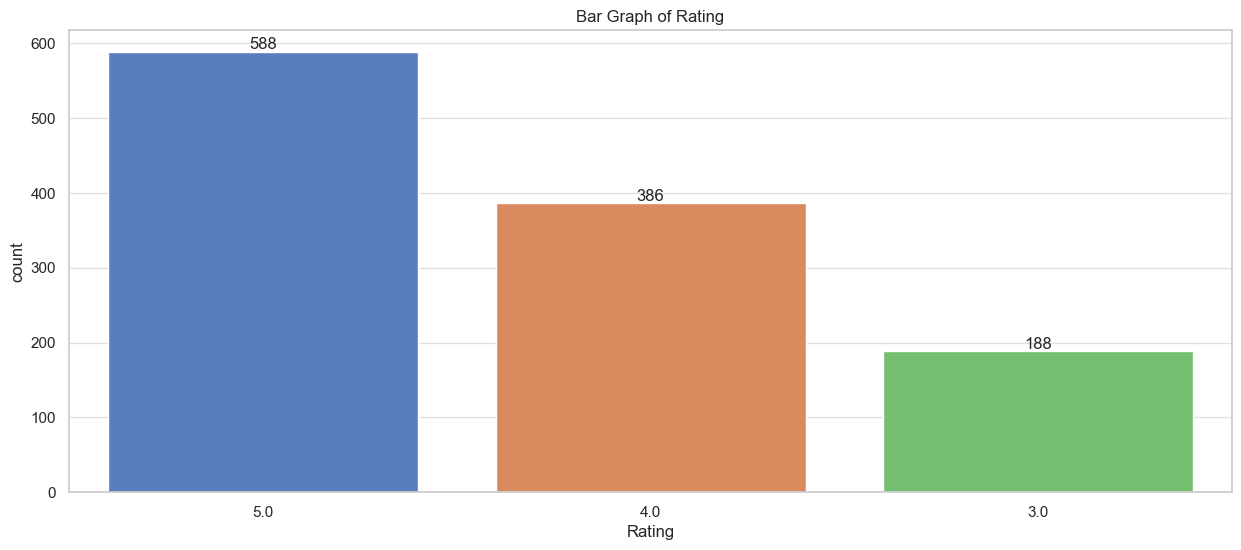

In [119]:
plot_helper.draw_countplot(x)

🔍 **_Observation_**:

This suggests that customers who do leave ratings generally tend to give high scores. The large number of 'Not given' ratings highlights the potential opportunity for the company to encourage more customers to share their feedback.

In [120]:
# helper cells
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Attribute: food_preparation_time

In [148]:
x = 'food_preparation_time'

In [149]:
# Stats
df[x].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [150]:
df[x].nunique()

16

🔍 Insights:

There are only 16 unique food preparation time (minutes), indicating it to be as discrete in nature

In [151]:
# explore | stats

food_preparation_time_counts = df[x].value_counts()
food_preparation_time_counts_pct = df[x].value_counts(normalize=True) * 100

food_preparation_time_counts

21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
31    116
26    115
25    113
34    113
32    113
29    109
Name: food_preparation_time, dtype: int64

In [152]:
food_preparation_time_counts_pct

21    7.112750
23    6.480506
27    6.480506
22    6.480506
28    6.375132
24    6.375132
20    6.269758
30    6.269758
33    6.217071
35    6.164384
31    6.111697
26    6.059009
25    5.953635
34    5.953635
32    5.953635
29    5.742887
Name: food_preparation_time, dtype: float64

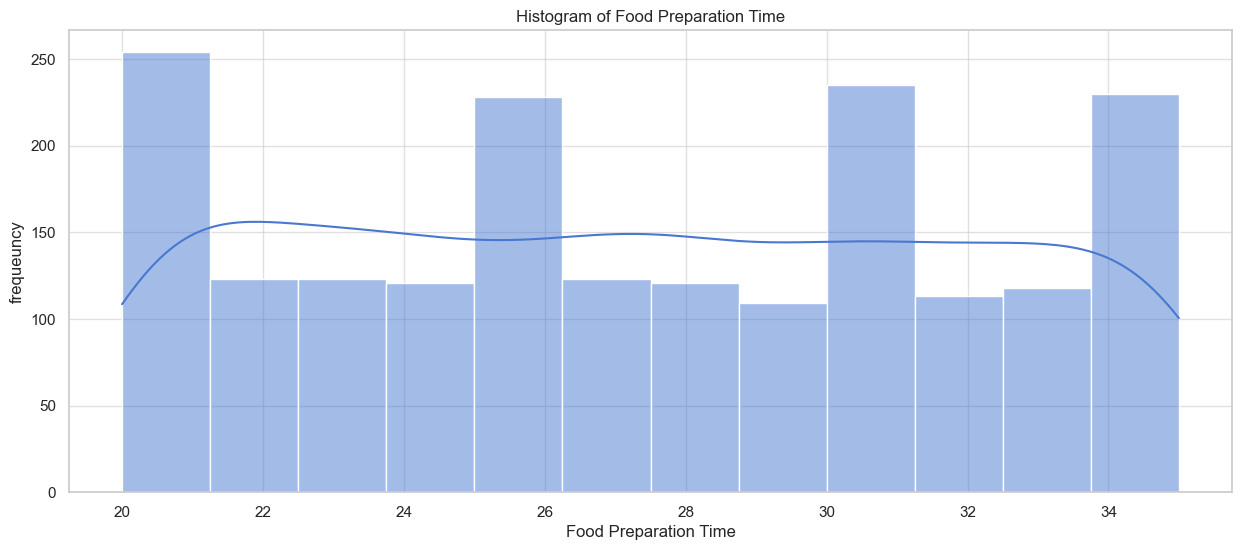

In [154]:
plot_helper.draw_histplot(x)

🔍 *Insights*: 

The histogram of food preparation time appears to be plateaued, with a consistent distribution across the range, indicating little variation in preparation times

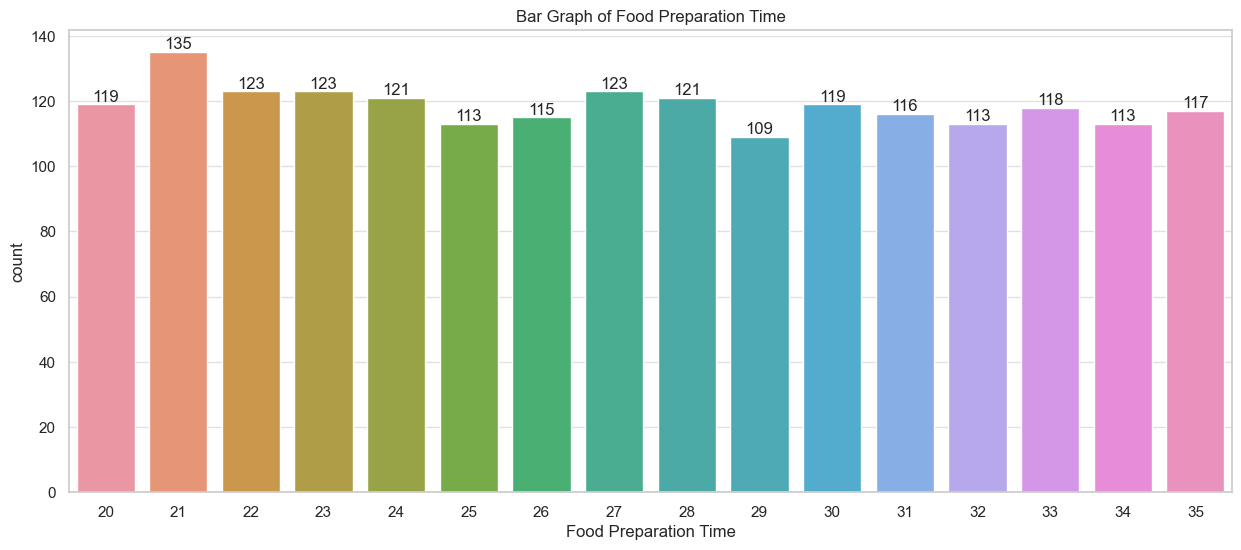

In [156]:
plot_helper.draw_countplot(x, sort=False)

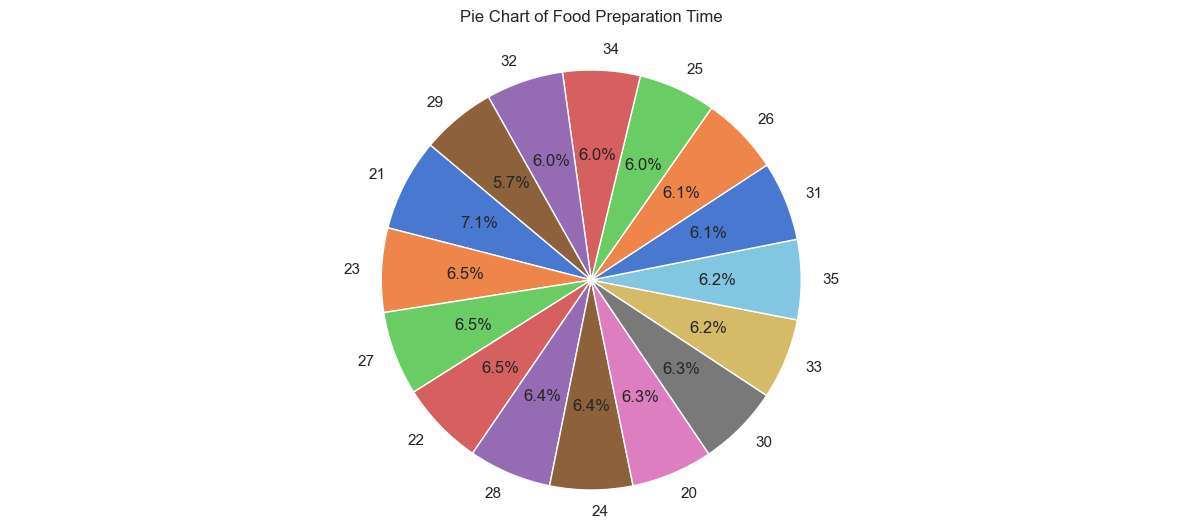

In [157]:
plot_helper.draw_pieplot(x)

🔍 *Insights*: 

The pie chart shows that the most common food preparation time is 21 minutes, making up 7.1% of all orders.

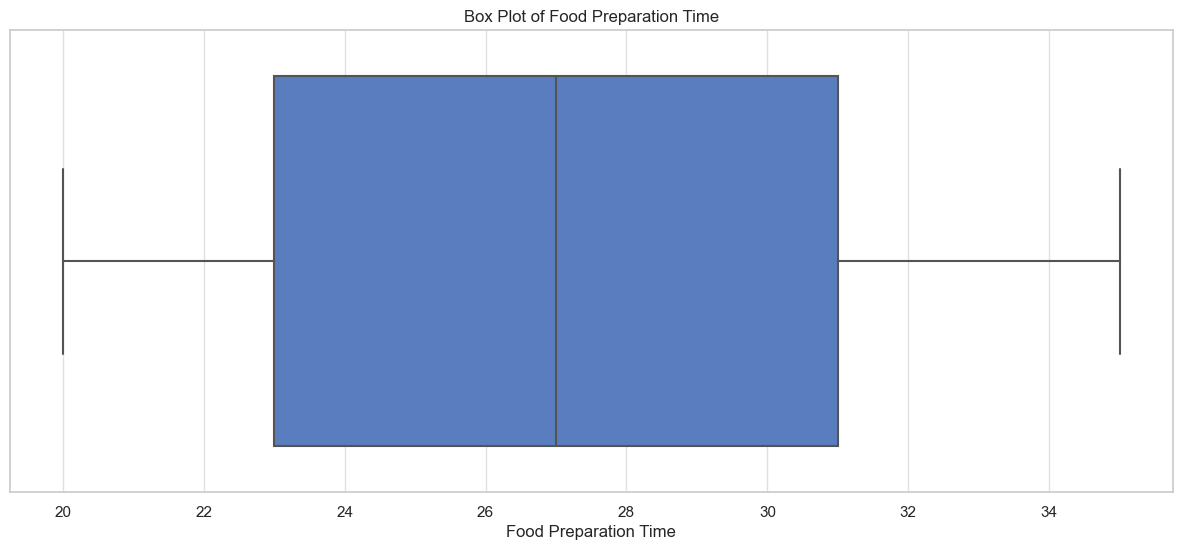

In [158]:
plot_helper.draw_boxplot(x)

🔍 **_Observation_**: 

The 'Food Preparation Time' column contains only 16 unique values, meaning that the time it takes for restaurants to prepare orders is fairly consistent. This could suggest that most restaurants have similar preparation times for their orders, or they may follow a standard process for preparing meals. It also indicates that there aren't many variations in how long it takes to prepare food across different orders.

The distribution of 'Food Preparation Time' shows that most orders are prepared within a time frame of 23 to 31 minutes.

In [159]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

#### Attribute: delivery_time

In [160]:
# numeric
x = 'delivery_time'

In [161]:
df[x].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

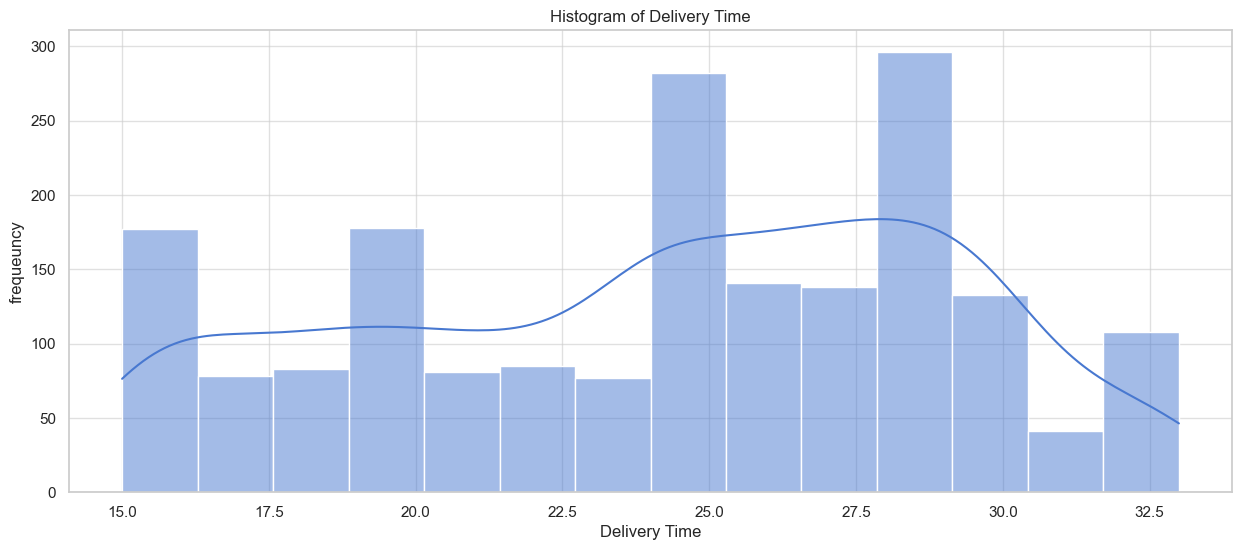

In [162]:
plot_helper.draw_histplot(x)

🔍 *Insights*: 

The histogram of delivery time is slightly left-skewed, with higher frequencies observed for longer delivery times on the right side

In [165]:
# Stats

# frequency of each delivery time
delivery_time_counts = df[x].value_counts()
delivery_time_counts

24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
15     87
22     85
18     83
21     81
17     78
23     77
32     59
33     49
31     41
Name: delivery_time, dtype: int64

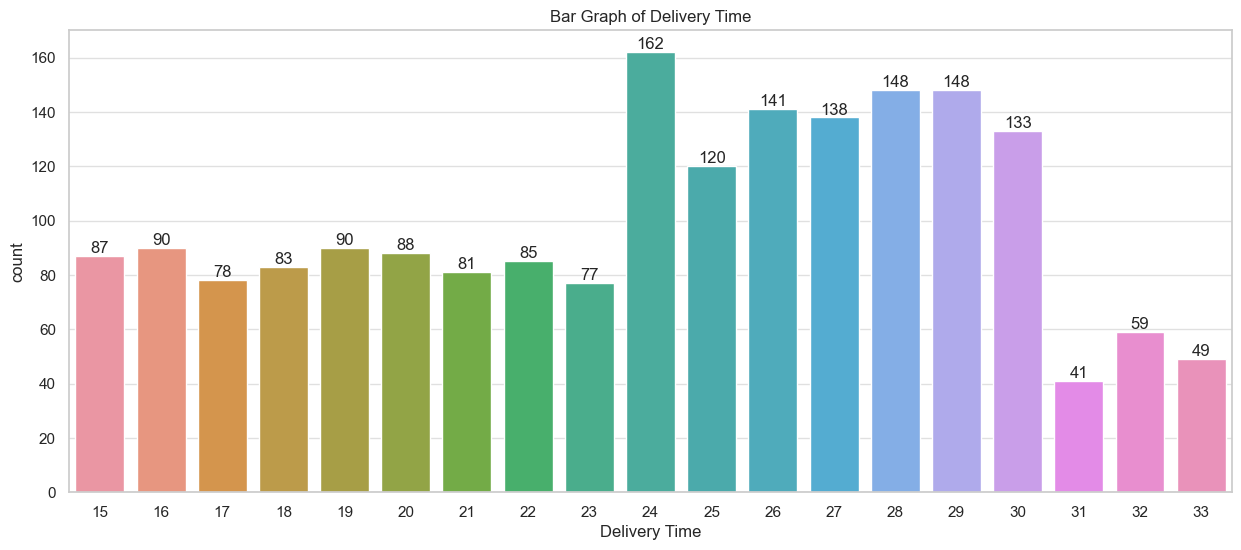

In [166]:
plot_helper.draw_countplot(x, sort=False)

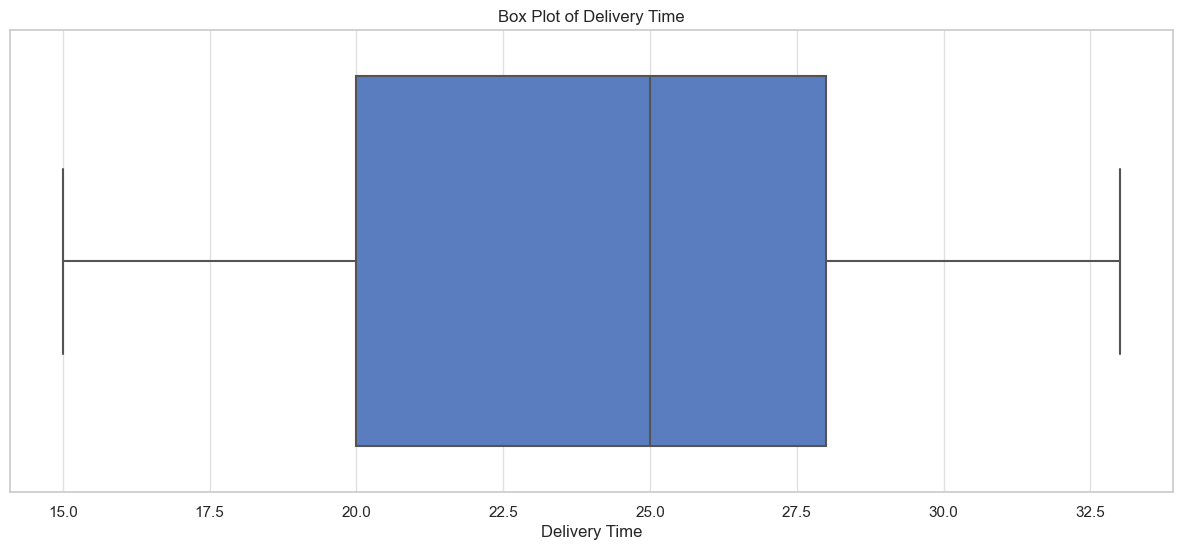

In [170]:
plot_helper.draw_boxplot(x)

In [171]:
df[x].describe()

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

📌 ***Points***:

- The average delivery time is approximately 24.16 minutes.
- The standard deviation is around 4.97 minutes, indicating some variability in delivery times.
- The minimum delivery time is 15 minutes.
- The 25th percentile (Q1) is 20 minutes, meaning 25% of the orders have a delivery time of 20 minutes or less.
- The median (50th percentile) delivery time is 25 minutes.
- The 75th percentile (Q3) is 28 minutes, meaning 25% of the orders have a delivery time of 28 minutes or more.
- The maximum delivery time is 33 minutes.

🔍 **_Observation_**: 

1. 25% of the deliveries are very fast, taking only 20 minutes or less
2. 50% of the deliveries take 25 minutes or less

On an average, deliveries take about 24 minutes, with most orders falling between 20 and 28 minutes. While the fastest deliveries are completed in 15 minutes, some take up to 33 minutes. Moreover, Half of all orders are delivered within 25 minutes.

The slight variability in delivery time (around 5 minutes) suggests a consistent but slightly flexible pace across delivery services

---

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [179]:
# Q7.
k = 5
# NOTE: The resulting object will be in descending order so that the first element is the most frequently-occurring element.
top_5_restaurant = df['restaurant_name'].value_counts().head(5)
top_5_restaurant

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [180]:
tableit(top_5_restaurant, index_label='Restaurant', value_label='Order Count')

+---------------------------+---------------+
| Restaurant                |   Order Count |
+===========================+===============+
| Shake Shack               |           219 |
+---------------------------+---------------+
| The Meatball Shop         |           132 |
+---------------------------+---------------+
| Blue Ribbon Sushi         |           119 |
+---------------------------+---------------+
| Blue Ribbon Fried Chicken |            96 |
+---------------------------+---------------+
| Parm                      |            68 |
+---------------------------+---------------+


🔍 **_Observation_**: 

The top 5 restaurants in terms of the number of orders received are:

1. Shake Shack with **219** orders,
2. The Meatball Shop with **132** orders,
3. Blue Ribbon Sushi  with **119** orders,
4. Blue Ribbon Fried Chicken **96** orders, and
5. Parm with **68** orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [184]:
weekend_orders = df[df['day_of_the_week'] == 'Weekend']
cuisine_order_count = weekend_orders['cuisine_type'].value_counts()
cuisine_order_count

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [185]:
# most popular cuisine and its percentage
most_popular_cuisine = cuisine_order_count.idxmax()
percentage = (cuisine_order_count.max() / cuisine_order_count.sum()) * 100

print(f"The most popular cuisine on weekends is {most_popular_cuisine} with {format_pct(percentage)} of weekend orders.")

The most popular cuisine on weekends is American with 30.72% of orders.


🔍 **_Observation_**: 

The most popular cuisine on weekends is *American* with a total of 415 orders, constituting around 31% of weekend orders. This indicates a strong preference for American cuisine among customers during weekends.

Restaurants offering American cuisine may experience higher demand on weekends and should be prepared to handle the increased volume of orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [188]:
# mask for orders with cost greater than 20
mask_cost_above_20 = df['cost_of_the_order'] > 20
percent_of_order_above_20 = mask_cost_above_20.mean() * 100
print(f"Percentage of orders with a cost above 20 dollar is {format_pct(percent_of_order_above_20)}")

Percentage of orders with a cost above 20 dollar is 29.24%


In [189]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

🔍 **_Observation_**: 

- This indicates that nearly one-third of the orders are relatively high-cost, suggesting that a significant portion of customers are willing to spend more on their food orders. This could suggest a preference for higher-end items or larger orders.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [191]:
avg_delivery_time = df['delivery_time'].mean()
print(f"The average delivery time is {avg_delivery_time:.2f} minutes.")

The average delivery time is 24.16 minutes.


#### Observations:

the mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [194]:
# Count the number of orders for each customer
order_counts = df['customer_id'].value_counts()

# Get the top 3 customers
top_3_customers = order_counts.head(3)

top_3_customers


52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

In [195]:
tableit(top_3_customers, index_label='Customer ID', value_label='Order Count')

+---------------+---------------+
|   Customer ID |   Order Count |
+===============+===============+
|         52832 |            13 |
+---------------+---------------+
|         47440 |            10 |
+---------------+---------------+
|         83287 |             9 |
+---------------+---------------+


🔍 **_Observation_**: 

The top 3 most frequent customers based on the number of orders placed are:

1. Customer ID 52832 with 13 order,
2. Customer ID 47440 with 10 order,
3. Customer ID 83287 with 9 order.
These customers will be eligible for the 20% discount vouchers.

The top 3 customers with the most orders, suggesting a small group of loyal customers place multiple orders. This indicates potential for targeted loyalty programs or special offers to further encourage repeat business from these high-value customers.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [38]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [39]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [42]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  